# Определение перспективного тарифа для телеком компании

**Цель**: Определить выгодный тариф для корректировки рекламного бюджета

**Выборка**:  500 пользователей тарифных планов "Смарт" и "Ультра": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год

**Примечание**: «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт:
* Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Описание тарифов
* Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 1. минута разговора: 3 рубля
 2. сообщение: 3 рубля
 3. 1 Гб интернет-трафика: 200 рублей
* Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 1. минута разговора: 1 рубль
 2. сообщение: 1 рубль
 3. 1 Гб интернет-трафика: 150 рублей

# Выполнению проекта

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#загружаем данные
try:
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv')
except:
    df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
    df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
    df_messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
    df_tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
    df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
    

In [3]:
#напишем функцию для визуального просмотра данных

def first_look(df):
    print('------------- Первые 5 строк -------------')
    display(df.head())
    print('')
    print('')
    print('------------- Информация о данных---------')
    df.info()
    print('')
    print('')
    print('------------- Пропуски -------------------')
    count = 0
    for i in df.columns:
        if df[i].isna().sum() > 0:
            print(i, ' - ', df[i].isna().sum(), 'пропуска(ов)')
            count += 1
    if count == 0:
        print('Пропусков нет')
    print('')
    print('')
    print('------------- Дубликаты ------------------')
    if df.duplicated().sum() > 0:
        print(f'Дубликатов: {df.duplicated().sum()}')
    else:
        print('Дубликатов нет')
    return

In [4]:
first_look(df_calls)

------------- Первые 5 строк -------------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000




------------- Информация о данных---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


------------- Пропуски -------------------
Пропусков нет


------------- Дубликаты ------------------
Дубликатов нет


**Вывод**:
* что пропусков нет
* дубликатов нет
* дату переведем в формат datetime64
* длительность звонков 0 минут, не ошибка - это пропущенные звонки
* длительность звонков нужно округлить до целой части в большую сторону

In [5]:
first_look(df_internet)

------------- Первые 5 строк -------------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000




------------- Информация о данных---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


------------- Пропуски -------------------
Пропусков нет


------------- Дубликаты ------------------
Дубликатов нет


**Вывод**:
* что пропусков нет
* дубликатов нет
* имеется первый столбец 'Unnamed: 0' - столбец для нумерации строк, т.к. в описании к данным этот столбец не указан. Удалим его
* округлим трафик до целого числа
* дату переведем в формат datetime64

In [6]:
first_look(df_messages)

------------- Первые 5 строк -------------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000




------------- Информация о данных---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


------------- Пропуски -------------------
Пропусков нет


------------- Дубликаты ------------------
Дубликатов нет


**Вывод**:
* что пропусков нет
* дубликатов нет
* дату переведем в формат datetime64

In [7]:
first_look(df_tariffs)

------------- Первые 5 строк -------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra




------------- Информация о данных---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


------------- Пропуски -------------------
Пропусков нет


------------- Дубликаты ------------------
Дубликатов нет


**Вывод**:
* что пропусков нет
* дубликатов нет

In [8]:
first_look(df_users)

------------- Первые 5 строк -------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra




------------- Информация о данных---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


------------- Пропуски -------------------
churn_date  -  462 пропуска(ов)


------------- Дубликаты ------------------
Дубликатов нет


**Вывод**:
* имеются пропуски в столбце churn_date, это не ошибка, т.к. пропуск означает, что тариф еще действовал на момент выгрузки
* дубликатов нет
* дату переведем в формат datetime64

### Общий вывод:
* пропуски только в столбце churn_date таблицы users, это не ошибка
* дубликатов нет
* имеется несоответствие формата даты в таблицах
* имеется лишний столбец 'Unnamed: 0' который не участвует в исследовании
* минуты нужно округлить в пользу увеличения

## Шаг 2. Подготовьте данные

### Исправление данных

In [9]:
#приведем дату к формату datetime64
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

#проверим
display(df_calls,df_internet, df_messages, df_users)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [10]:
#добавим столбец с началом календарного месяца, т.к. точность до дня нам не интересна
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')
#округлим до целого числа
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
#првоерим
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,2018-12-01
202603,1499_216,2018-10-18,19,1499,2018-10-01
202604,1499_217,2018-11-10,11,1499,2018-11-01
202605,1499_218,2018-10-06,5,1499,2018-10-01


In [11]:
#удалим столбец 'Unnamed: 0'
df_internet = df_internet.drop(['Unnamed: 0'], axis=1)

#добавим столбец с началом календарного месяца, т.к. точность до дня нам не интересна
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')

#проверим
df_internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,1000_4,302.56,2018-09-24,1000,2018-09-01
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,2018-10-01
149392,1499_153,490.13,2018-12-14,1499,2018-12-01
149393,1499_154,0.00,2018-10-27,1499,2018-10-01
149394,1499_155,1246.32,2018-11-26,1499,2018-11-01


In [12]:
#добавим столбец с началом календарного месяца, т.к. точность до дня нам не интересна
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')

#проверим
df_messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01
...,...,...,...,...
123031,1499_179,2018-12-12,1499,2018-12-01
123032,1499_180,2018-09-28,1499,2018-09-01
123033,1499_181,2018-09-27,1499,2018-09-01
123034,1499_182,2018-11-15,1499,2018-11-01


### Вывод

Были скорректирвоанны данные для дальнейшего исследования

### Расчет потребления различных услуг для каждого клиента

In [13]:
#посчитаем количество и длительность звонков по месяцам
df_calls['month_num'] = df_calls['call_date'].dt.month # создадим столбец для нумерации месяца
df_calls_month = df_calls.pivot_table(index=['user_id', 'month_num'], values=['duration'], aggfunc=['sum', 'count'])
df_calls_month.columns = ['month_call_duration', 'month_call_count']
df_calls_month

month_call_duration  month_call_count
user_id month_num                                       
1000    5                          159                22
        6                          172                43
        7                          340                47
        8                          408                52
        9                          466                58
...                                ...               ...
1498    10                         247                41
1499    9                           70                 9
        10                         449                68
        11                         612                74
        12                         492                69

[3174 rows x 2 columns]

In [14]:
#посчитаем количество сообщений по месяцам
df_messages['month_num'] = df_messages['message_date'].dt.month # создадим столбец для нумерации месяца
df_messages_month = df_messages.pivot_table(index=['user_id', 'month_num'], values=['message_date'], aggfunc=['count'])
df_messages_month.columns = ['month_messages_count']
df_messages_month

month_messages_count
user_id month_num                      
1000    5                            22
        6                            60
        7                            75
        8                            81
        9                            57
...                                 ...
1498    10                           42
1499    9                            11
        10                           48
        11                           59
        12                           66

[2717 rows x 1 columns]

In [15]:
#посчитаем количество израсходованного трафика по месяцам
df_internet['month_num'] = df_internet['session_date'].dt.month # создадим столбец для нумерации месяца
df_internet_month = df_internet.pivot_table(index=['user_id', 'month_num'], values=['mb_used'], aggfunc=['sum'])
df_internet_month.columns = ['month_internet_sum']
df_internet_month

month_internet_sum
user_id month_num                    
1000    5                     2253.49
        6                    23233.77
        7                    14003.64
        8                    14055.93
        9                    14568.91
...                               ...
1498    10                   20579.36
1499    9                     1845.75
        10                   17788.51
        11                   17963.31
        12                   13055.58

[3203 rows x 1 columns]

Для рассчета помесячной выручки объеденим все сводные таблицы и таблицу df_users

In [16]:
df_cmi_pivot1 = df_internet_month.join(df_calls_month, how='outer')
df_cmi_pivot1 

month_internet_sum  month_call_duration  month_call_count
user_id month_num                                                           
1000    5                     2253.49                159.0              22.0
        6                    23233.77                172.0              43.0
        7                    14003.64                340.0              47.0
        8                    14055.93                408.0              52.0
        9                    14568.91                466.0              58.0
...                               ...                  ...               ...
1498    10                   20579.36                247.0              41.0
1499    9                     1845.75                 70.0               9.0
        10                   17788.51                449.0              68.0
        11                   17963.31                612.0              74.0
        12                   13055.58                492.0              69.0

[3214 rows x 3 columns]

In [17]:
df_cmi_pivot = df_cmi_pivot1.merge(df_messages_month, on=['user_id', 'month_num'], how='outer').reset_index(level='month_num')
df_cmi_pivot

,month_num,month_internet_sum,month_call_duration,month_call_count,month_messages_count
user_id,,,,,
1000,5,2253.49,159.0,22.0,22.0
1000,6,23233.77,172.0,43.0,60.0
1000,7,14003.64,340.0,47.0,75.0
1000,8,14055.93,408.0,52.0,81.0
1000,9,14568.91,466.0,58.0,57.0
...,...,...,...,...,...
1498,10,20579.36,247.0,41.0,42.0
1499,9,1845.75,70.0,9.0,11.0
1499,10,17788.51,449.0,68.0,48.0


In [18]:
# объединяем df_users и df_cmi_pivot также методом join
# параметру 'on' передаем значения df_users['user_id']
# метод join будет искать совпадения этих значений с индексами df_cmi_pivot и объединять по ним

df_cmiu_pivot = df_cmi_pivot.merge(df_users, on='user_id', how='outer')
df_cmiu_pivot

,user_id,month_num,month_internet_sum,month_call_duration,month_call_count,month_messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,2253.49,159.0,22.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,23233.77,172.0,43.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,14003.64,340.0,47.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,14055.93,408.0,52.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,14568.91,466.0,58.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,10.0,17788.51,449.0,68.0,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3212,1499,11.0,17963.31,612.0,74.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3213,1499,12.0,13055.58,492.0,69.0,66.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [19]:
# удалим столбцы, которые нам не пригодятся чтобы легче было ориентироваться в таблице

df_cmiu_pivot = df_cmiu_pivot.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')
df_cmiu_pivot

,user_id,month_num,month_internet_sum,month_call_duration,month_call_count,month_messages_count,age,city,tariff
0,1000,5.0,2253.49,159.0,22.0,22.0,52,Краснодар,ultra
1,1000,6.0,23233.77,172.0,43.0,60.0,52,Краснодар,ultra
2,1000,7.0,14003.64,340.0,47.0,75.0,52,Краснодар,ultra
3,1000,8.0,14055.93,408.0,52.0,81.0,52,Краснодар,ultra
4,1000,9.0,14568.91,466.0,58.0,57.0,52,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3211,1499,10.0,17788.51,449.0,68.0,48.0,35,Пермь,smart
3212,1499,11.0,17963.31,612.0,74.0,59.0,35,Пермь,smart
3213,1499,12.0,13055.58,492.0,69.0,66.0,35,Пермь,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,Волжский,ultra


In [20]:
# добавим к df_cmiu_pivot информацию о тарифах из таблицы df_tariffs
# объединим таблицы по колонке с названиями тарифов
# для этого сначала в df_tariffs поменяем название нужного столбца на tariff

df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
# применим метод merge, параметру "on" передадим колонку с названиями тарифов, параметр "how" по умолчанию "inner"

df_cmiu_pivot = df_cmiu_pivot.merge(df_tariffs, on='tariff')
df_cmiu_pivot.head()

,user_id,month_num,month_internet_sum,month_call_duration,month_call_count,month_messages_count,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,2253.49,159.0,22.0,22.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,23233.77,172.0,43.0,60.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,14003.64,340.0,47.0,75.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,14055.93,408.0,52.0,81.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,14568.91,466.0,58.0,57.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1


После объединения таблиц образовалось немало пропусков, особенно в messages_count. Это произошло из-за разницы в исходных данных (см. "Общая информация о данных"). Оставить как есть или отбросить их не вариант, т.к. в первом случае они повляют на дальнейшие расчеты, а во втором потеряем много данных. Поэтому заменим все пропуски на ноль.

In [22]:
# проверим на пропуски получившийся датафрейм

df_cmiu_pivot.isnull().sum()

user_id                    0
month_num                  2
month_internet_sum        13
month_call_duration       42
month_call_count          42
month_messages_count     499
age                        0
city                       0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [23]:
# пропуски в колонке month_num заменить на ноль нельзя, всего три строки с пропусками, поэтому удалим их

df_cmiu_pivot[df_cmiu_pivot['month_num'].isnull()]

,user_id,month_num,month_internet_sum,month_call_duration,month_call_count,month_messages_count,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,51,Волжский,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,50,Омск,smart,50,15360,500,550,200,3,3


In [24]:
df_cmiu_pivot = df_cmiu_pivot.dropna(subset=['month_num'])
#проверим
df_cmiu_pivot[df_cmiu_pivot['month_num'].isnull()]

,user_id,month_num,month_internet_sum,month_call_duration,month_call_count,month_messages_count,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [25]:
# остальные пропуски заменим на ноль
df_cmiu_pivot = df_cmiu_pivot.fillna(0)
#проверим
df_cmiu_pivot.isnull().sum()

user_id                  0
month_num                0
month_internet_sum       0
month_call_duration      0
month_call_count         0
month_messages_count     0
age                      0
city                     0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Рассчитаем помесячную выручку при помощи функции total_bill_monthly, в которой в качестве pd.Series будет выступать строка датафрейма.

In [26]:
def total_bill_monthly(row):
    
#определим переменные
    
    bill_minutes = 0
    bill_sms = 0
    bill_traffic = 0
    minutes = row['month_call_duration']
    sms = row['month_messages_count']
    traffic = row['month_internet_sum']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

#проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа
#если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
#если больше - то разницу умножаем на стоимость сверх тарифного плана
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        bill_minutes = 0
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        bill_sms = 0
    if traffic > traffic_limit:
        bill_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb# округляем мегабайты вверх до гигабайт
    if traffic < traffic_limit:
        bill_traffic = 0
        
#функция возвращает итоговый счет за месяц для клиента,
#в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
        
    return bill_minutes + bill_sms + bill_traffic + monthly_fee

In [27]:
#применим функцию к датафрейму
#метод apply() применяем в нашем случае ко всему датафрейму
#чтобы на вход в функцию отправлялись строки, указываем параметр axis = 1 метода apply()

df_cmiu_pivot['total_bill'] = df_cmiu_pivot.apply(total_bill_monthly, axis=1)
df_cmiu_pivot

,user_id,month_num,month_internet_sum,month_call_duration,month_call_count,month_messages_count,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,5.0,2253.49,159.0,22.0,22.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,23233.77,172.0,43.0,60.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,14003.64,340.0,47.0,75.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,14055.93,408.0,52.0,81.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,14568.91,466.0,58.0,57.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,1498,10.0,20579.36,247.0,41.0,42.0,68,Владикавказ,smart,50,15360,500,550,200,3,3,1750.0
3211,1499,9.0,1845.75,70.0,9.0,11.0,35,Пермь,smart,50,15360,500,550,200,3,3,550.0
3212,1499,10.0,17788.51,449.0,68.0,48.0,35,Пермь,smart,50,15360,500,550,200,3,3,1150.0
3213,1499,11.0,17963.31,612.0,74.0,59.0,35,Пермь,smart,50,15360,500,550,200,3,3,1513.0


# Шаг 3. Анализ данных

**Чтобы посмотреть поведение клиентов посчитаем помесячную сумму исследуемых параметров для всех пользователей:**

In [28]:
df_month_sum = (df_cmiu_pivot
                .pivot_table(index=['tariff', 'month_num'],
                             values=['month_call_count', 'month_call_duration', 'month_messages_count', 'month_internet_sum', 'total_bill'],
                             aggfunc=sum))

df_month_sum = df_month_sum.reset_index(level='month_num')
df_month_sum

,month_num,month_call_count,month_call_duration,month_internet_sum,month_messages_count,total_bill
tariff,,,,,,
smart,1.0,941.0,6931.0,289466.40,620.0,24525.0
smart,2.0,2331.0,17324.0,672629.15,1397.0,48001.0
smart,3.0,4183.0,30034.0,1163020.25,2453.0,89676.0
smart,4.0,5747.0,41119.0,1507764.23,3443.0,107866.0
smart,5.0,7789.0,54618.0,2228530.99,4762.0,168849.0
smart,6.0,9110.0,64885.0,2590322.27,5478.0,197459.0
smart,7.0,11402.0,82079.0,3164373.22,6784.0,246014.0
smart,8.0,13860.0,99045.0,3903519.22,7905.0,310340.0
smart,9.0,15482.0,111439.0,4238930.49,8746.0,324986.0


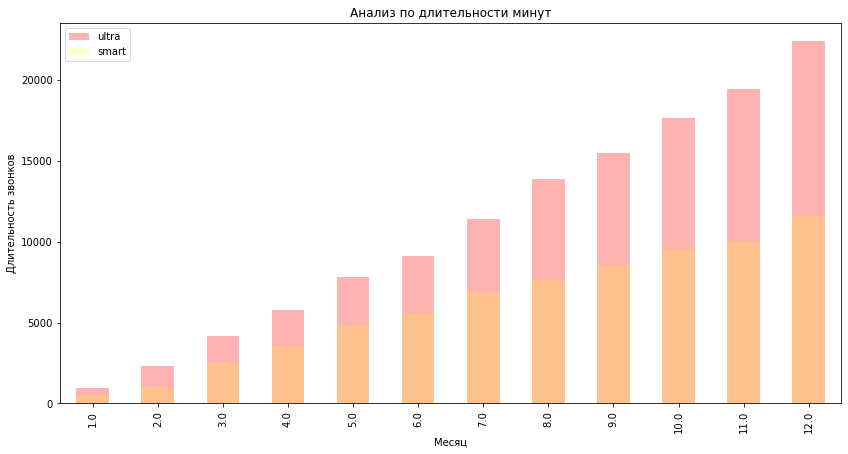

In [29]:
##КОД РЕВЬЮЕРА
ax = df_month_sum[df_month_sum.index=='smart'].plot(kind='bar', x='month_num', y='month_call_count', figsize=(14, 7), alpha=0.3, color='red', label="ultra", grid=True, legend=True)
df_month_sum[df_month_sum.index=='ultra'].plot(kind='bar',  x='month_num', y='month_call_count', ax=ax, color='yellow', alpha=0.2, label="smart", legend=True);
plt.xlabel('Месяц')
plt.ylabel('Длительность звонков')
plt.title('Анализ по длительности минут')
plt.show();

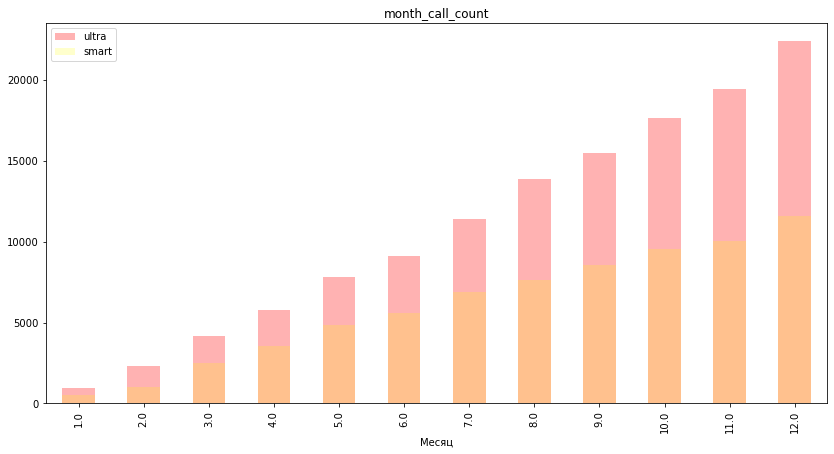

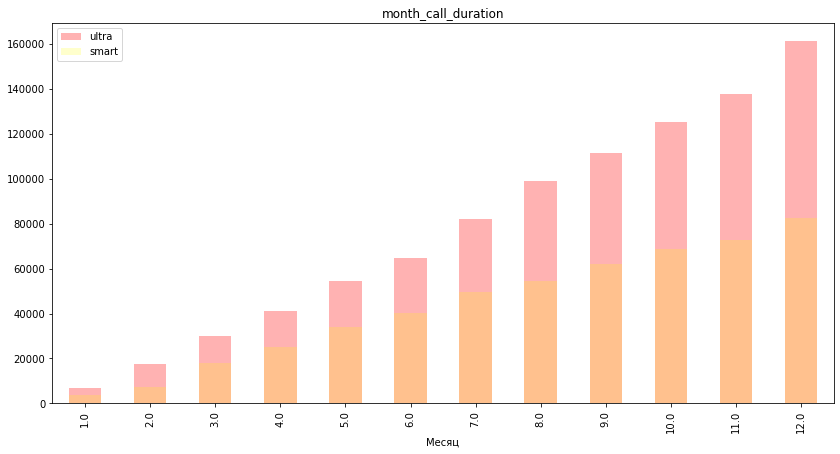

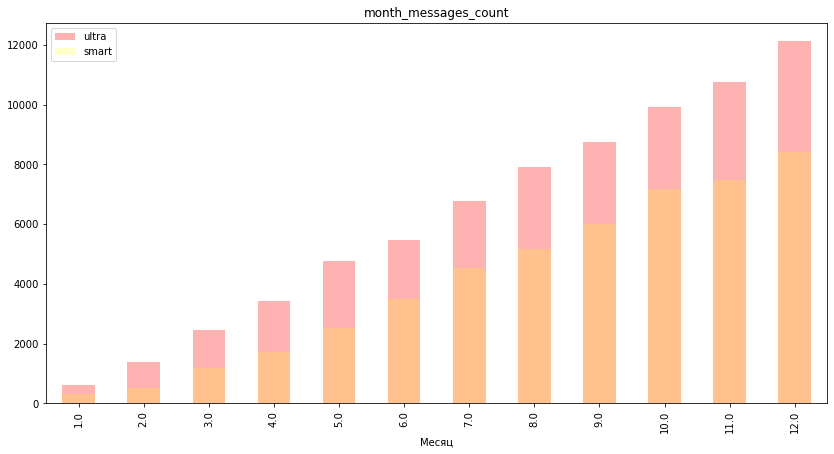

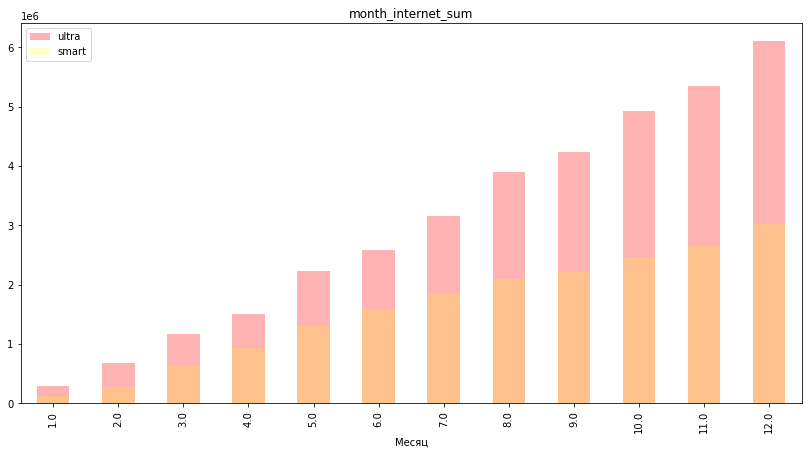

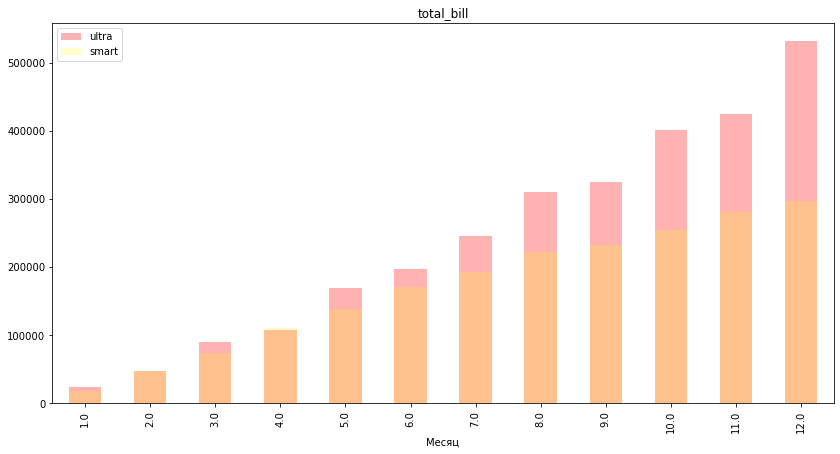

In [30]:
for dms_col_name_2 in ['month_call_count', 'month_call_duration', 'month_messages_count', 'month_internet_sum', 'total_bill']:
    ax = df_month_sum[df_month_sum.index=='smart'].plot(kind='bar', x='month_num', y=dms_col_name_2, figsize=(14, 7), alpha=0.3, color='red', label="ultra", grid=True, legend=True)
    df_month_sum[df_month_sum.index=='ultra'].plot(kind='bar',  x='month_num', y=dms_col_name_2, ax=ax, color='yellow', alpha=0.2, label="smart", legend=True);
    plt.xlabel('Месяц')
    plt.title(dms_col_name_2)
    plt.show();

**На количественные показатели здесь можно не смотреть, т.к. объем выборок разный:**


    
Вывод по графикам:
    
Видим, что из месяца в месяц, увеличивается активность абонентов. 
Большая активность у абанентов ultra, причем по некоторым показателям и в определенные месяца разница достигает почти  50%


In [31]:
df_cmiu_pivot[df_cmiu_pivot['tariff']=='smart']['tariff'].count()

2229

In [32]:
df_cmiu_pivot[df_cmiu_pivot['tariff']=='ultra']['tariff'].count()

985

А вот поведение клиентов в течение рассматриваемого периода времени графики показывают очень хорошо:
как видим все параметры (количество звонков, продолжительность разговоров, количество сообщений, объем израсходованного интернет-трафика и ежемесячный счет) растут от января к декабрю, причем растут довольно таки линейно и не зависимо от того, какой тариф используют клиенты.

In [33]:
for i in range(0, 3):
    functions = ['mean', np.var, np.std]# функции, которые будем применять к значениям
    tables = ['total_month_sum_mean', 'total_month_sum_var', 'total_month_sum_std']# названия сводных таблиц
    list_of_cols = ['month_call_duration', 'month_messages_count', 'month_internet_sum', 'total_bill']# значения
    suffix = ['_mean', '_var', '_std']# суффикс, который добавим к именам колонок
    
    tables[i] = df_cmiu_pivot.pivot_table(index=['tariff'], values=list_of_cols, aggfunc=functions[i])
    tables[i].columns = ['month_call_duration'+suffix[i], 'month_message_count'+suffix[i],\
                         'month_internet_sum'+suffix[i], 'total_bill'+suffix[i]]
    display(tables[i])

,month_call_duration_mean,month_message_count_mean,month_internet_sum_mean,total_bill_mean
tariff,,,,
smart,417.934948,16208.386990,33.384029,1289.973531
ultra,526.623350,19468.805208,49.363452,2070.152284


,month_call_duration_var,month_message_count_var,month_internet_sum_var,total_bill_var
tariff,,,,
smart,36219.315784,3.446250e+07,796.812958,669785.708006
ultra,100873.633397,1.017510e+08,2285.266143,141516.745079


,month_call_duration_std,month_message_count_std,month_internet_sum_std,total_bill_std
tariff,,,,
smart,190.313730,5870.476681,28.227876,818.404367
ultra,317.606098,10087.170752,47.804457,376.187114


В среднем пользователи тарифа ультра больше пользуются услугами оператора, чем пользователи тарифа смарт.

Однако рассеяние вокруг среднего значения у ультра также выше, кроме параметра интернет-трафик. Тут можно выделить два момента:

* большая дисперсия у ультра можно объяснить меньшим объемом выборки, чем у смарт;
* меньшая дисперсия в интрнет-трафике говорит о том, что возможно пользователи выбирают тариф ультра из-за большого включенного пакета мегабайт трафика, т.к. сейчас в основном большая часть звонков и сообщений передается посредством сети интрнет. Т.о. пользователи ультра не заботятся об экономии трафика и используют его свободно, что приводит к среднему с меньшим разбросом. В то время как пользователи смарт экономно используют свой лимит и в итоге к концу месяца у многих оставшийся трафик сгорает, а у некоторых, кто "забылся" и не следил за лимитом, - перерасход.

**Посмотрим какое количество пользователей тратит то или иное количество предоставленных услуг. Для этого построим частотные гистограммы:**

In [34]:
# сгруппируем данных сводной таблицей по тарифу и пользователям:
cmit_sum_for_hist = (df_cmiu_pivot
                     .pivot_table(index=['tariff', 'user_id'],\
                                  values=['month_call_count', 'month_call_duration', 'month_messages_count', 'month_internet_sum', 'total_bill'],\
                                  aggfunc=sum))

# расставим столбцы в удобном порядке:
cols = cmit_sum_for_hist.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[-2:4]
cmit_sum_for_hist = cmit_sum_for_hist[cols]

cmit_sum_for_hist.reset_index(inplace=True)

cmit_sum_for_hist

,tariff,user_id,month_call_count,month_call_duration,month_internet_sum,total_bill,month_messages_count
0,smart,1001,122.0,844.0,32466.00,1700.0,0.0
1,smart,1002,217.0,1517.0,116036.52,7250.0,70.0
2,smart,1005,888.0,6605.0,99687.31,9924.0,552.0
3,smart,1006,506.0,3501.0,164188.81,10250.0,0.0
4,smart,1007,612.0,4379.0,131625.67,8221.0,225.0
...,...,...,...,...,...,...,...
493,ultra,1476,549.0,4204.0,150285.91,17550.0,45.0
494,ultra,1485,94.0,584.0,23422.76,1950.0,155.0
495,ultra,1491,648.0,4620.0,161462.24,17550.0,432.0
496,ultra,1493,110.0,744.0,54419.37,5700.0,94.0


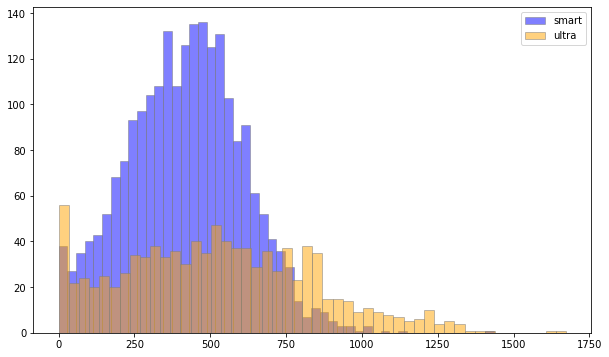

In [35]:
##КОД РЕВЬЮЕРА
smart = df_cmiu_pivot.query('tariff == "smart"')['month_call_duration']
ultra = df_cmiu_pivot.query('tariff == "ultra"')['month_call_duration']

plt.figure(figsize=(10,6))
plt.hist(smart, bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
plt.hist(ultra, bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
plt.legend()
plt.show()

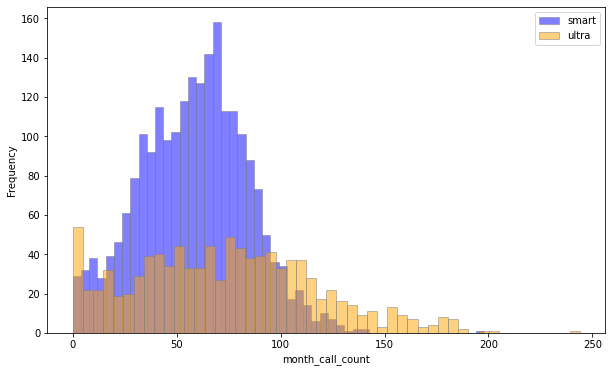

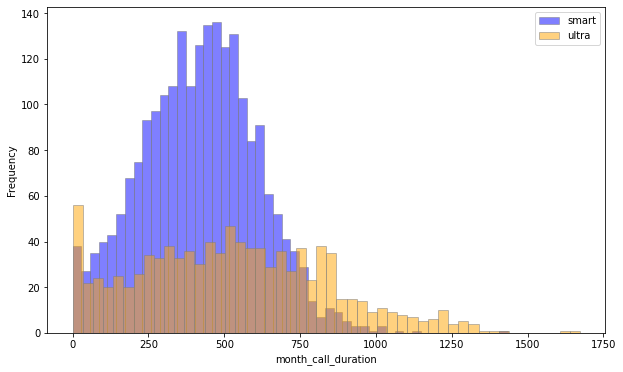

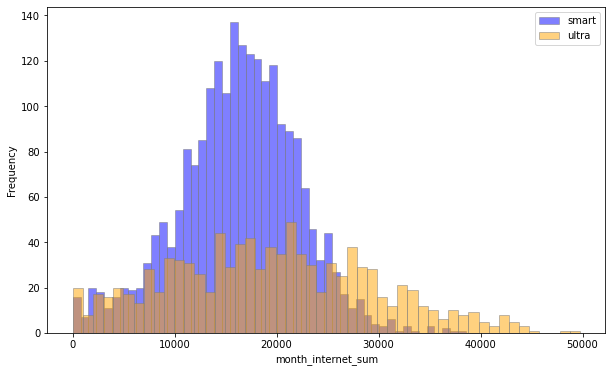

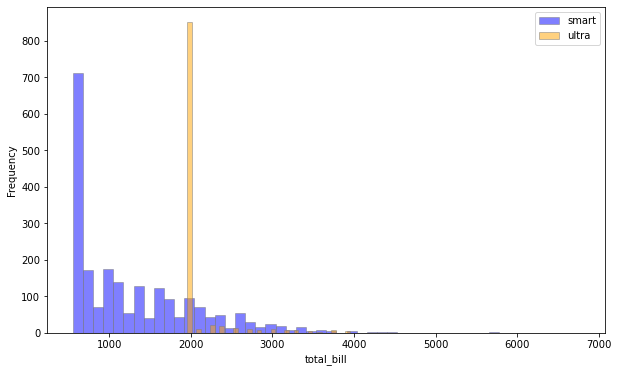

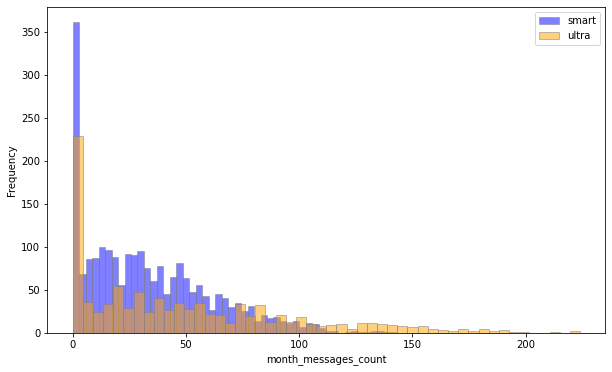

In [39]:
for col_df_cmiu in cmit_sum_for_hist.columns[2:]:
    smart = df_cmiu_pivot.query('tariff == "smart"')[col_df_cmiu]
    ultra = df_cmiu_pivot.query('tariff == "ultra"')[col_df_cmiu]

    plt.figure(figsize=(10,6))
    plt.hist(smart, bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
    plt.hist(ultra, bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
    plt.xlabel(col_df_cmiu)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

В силу большей дисперсии ультра имеет более длинные хвосты чем смарт.

**Вывод по графикам:**
* Количество звонков: Пик у смарт приходится на 70, у ультра - около 0 и 75.
* Продолжительность звонков: У смарт и ультра пика около 500 минут. Также видим, что у ультра есть небольшой пик на околонулевых значениях (0 - 250).
* Количество сообщений: В обоих тарифах высока доля людей крайне мало использующих смс. При этом следует помнить, что ранее мы заменили 500 пропусков в датафрейме нулями и сейчас наблюдаем результаты этого действия. Но в любом случае все сейчас пользуются месенджерами.
* Интернет-трафик: Пик у абонентов тарифа смарт приходится на 16 000 мб, а у ультры на 22 000 мб.
* Итоговый счет: Абоненты тарифа смарт в основном не выходяят за лимит, но около четверти абонентов платят более 550 р., что касается ультры, то менее 1% выходят за лимиты

# Шаг 4. Проверка гипотез

## Гипотеза 1

Первая гипотеза которую нужно проверить - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформулируем нулевую и альтернативную гипотезы:

* H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны (в H0 всегда используется знак равенства);
* H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

Чтобы проверить гипотезу о равенстве среднего применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать). Т.к. мы знаем, что дисперсии выборок по смарт и ультра различаются (3.436001e+07 и 9.886460e+07 соответственно), то equal_var зададим как False.

In [37]:
smart_ttest = df_cmiu_pivot[df_cmiu_pivot['tariff']=='smart']['total_bill']
ultra_ttest = df_cmiu_pivot[df_cmiu_pivot['tariff']=='ultra']['total_bill']

# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


p-уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 5% => средняя выручка пользователей тарифов смарт и ульра значимо отличаются друг от друга.

## Гипотеза 2

Вторая гипотеза для проверки звучит так - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

* Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
* Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Альтернативная гипотеза у нас двусторонняя, т.к. средняя выручка из Москвы может отличаться от других регионов как в большую так и в меньшую сторону.

Для проверки гипотезы воспользуемся методом scipy.stats.ttest_1samp (array, popmean), где в качестве массива данных будет выборка выручки по москвичам, а в качестве popmean (предполагаемого среднего, на равенство которому мы делаем тест) будет выступать среднее значение выручки пользователей из других регионов.

In [38]:
moscow_ttest = df_cmiu_pivot[df_cmiu_pivot['city']=='Москва']['total_bill']

popmean = df_cmiu_pivot[df_cmiu_pivot['city']!='Москва']['total_bill'].mean()

# уровень значимости 5%
alpha = 0.05

results = st.ttest_1samp(moscow_ttest, popmean)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4744239730695693
Не получилось отвергнуть нулевую гипотезу


р-уровень значимости составил почти 47%, что значительно выше 5% => средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

# Вывод

Сделав предварительный анализ тарифов на небольшой выборке пользователей можем передать следующие результаты коммерческому отделу:

* Средние чеки тарифов смарт и ультра значимо различаются. В среднем пользователи тарифа ультра платят больше;
* Т.к. средняя выручка по Москве и другим регионам значимо не различаются, то рекламную компанию можно устроить по всей территории распространения сети;
* Поведение клиентов в течение года очень хорошо отображено на графиках. Эти графики будут полезны чтобы скорректировать во времени рекламные компании.

**По выгодному тарифу:**
* По большому счету, для этого достаточно было бы посмотреть на среднюю выручку и в ней явно выигрывает тариф "Ультра". Хотя тариф "Смарт" я бы также не сбрасывал со счетов, т.к. его пользователи часто переплачивают за услуги связи. К тому же, этот факт можно использовать, чтобы стимулировать их к переходу на тариф "Ультра".

* В целом, предоставляемое тарифом Ультра зачастую избыточно и можно считать, что пользователи переплачивают.

# Выводы_new

Были получены данные оператора "Мегалайн". Данные включают всевозможное использование абонентом услуг телеоператора. После предобработки данных мной был выполнен анализ со следующими выводами:

В силу большей дисперсии ультра имеет более длинные хвосты чем смарт.

**Вывод по графикам:**
* Количество звонков: Пик у смарт приходится на 70, у ультра - около 0 и 75.
* Продолжительность звонков: У смарт и ультра пика около 500 минут. Также видим, что у ультра есть небольшой пик на околонулевых значениях (0 - 250).
* Количество сообщений: В обоих тарифах высока доля людей крайне мало использующих смс. При этом следует помнить, что ранее мы заменили 500 пропусков в датафрейме нулями и сейчас наблюдаем результаты этого действия. Но в любом случае все сейчас пользуются месенджерами.
* Интернет-трафик: Пик у абонентов тарифа смарт приходится на 16 000 мб, а у ультры на 22 000 мб.
* Итоговый счет: Абоненты тарифа смарт в основном не выходяят за лимит, но около четверти абонентов платят более 550 р., что касается ультры, то менее 1% выходят за лимиты
* Из месяца в месяц потребление услуг у обоих тарифов растет, причем линейно.
* Несмотря на то, что выборки у нас разные, абонентов smart 2229, а абонентов ultra 985, что составляет чуть меньше половины от smart (44%), средняя длительность звонков в месяц у smart 394, у ultra 497 (ultra больше на 26%), среднее количество сообщений 16 229 и 19 486 соответственно (ultra больше на 20%), средний трафик в месяц 33 ГБ и 49 ГБ соответственно (ultra больше на 48%), средняя выручка 1 261 и 2 071 р. соответственно ( ultra больше на 64 %)
* Средняя выручка тарифов ultra и smart различаются
* Средняя выручка абонентов из Москвы почит не отличается от абонентов из регионов

**Итоговый выводы по тарифу:** Тариф "Ультра" перспективней

**Итоговый вывод по рекламе:** Т.к. средняя выручка по Москве и другим регионам значимо не различаются, то рекламную компанию можно устроить по всей территории распространения сети